<a href="https://colab.research.google.com/github/AbdulMominAlam/DSA/blob/main/EDA_DSA210.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import files

import pandas as pd

# Load the datasets
df_macro = pd.read_csv("dataset1_macro_rnd.csv")
df_gov = pd.read_csv("dataset2_gov_rnd_share.csv")
df_exports = pd.read_csv("dataset3_tech_exports.csv")


In [4]:
# Preview first few rows
print("Macroeconomic + R&D Data:")
display(df_macro.head())

print("\nGovernment R&D Share:")
display(df_gov.head())

print("\nHigh-Tech Export Data:")
display(df_exports.head())

# Check for missing values
print("Missing values:\n")
print(df_macro.isnull().sum())
print(df_gov.isnull().sum())
print(df_exports.isnull().sum())


Macroeconomic + R&D Data:


,Country,Year,GDP_Growth,Inflation,Unemployment,R&D_Spending
0,USA,2010,3.25,1.86,7.30,3.45
1,USA,2011,2.15,1.77,9.16,3.21
2,USA,2012,1.80,2.54,5.07,3.00
3,USA,2013,2.86,0.09,2.55,3.16
4,USA,2014,0.98,2.31,4.18,2.80



Government R&D Share:


,Country,Year,Gov_R&D_Share
0,USA,2010,29.96
1,USA,2011,25.69
2,USA,2012,20.76
3,USA,2013,36.32
4,USA,2014,21.77



High-Tech Export Data:


,Country,Year,HighTech_Exports
0,USA,2010,30.76
1,USA,2011,21.35
2,USA,2012,6.02
3,USA,2013,11.25
4,USA,2014,33.64


Missing values:

Country         0
Year            0
GDP_Growth      0
Inflation       0
Unemployment    0
R&D_Spending    0
dtype: int64
Country          0
Year             0
Gov_R&D_Share    0
dtype: int64
Country             0
Year                0
HighTech_Exports    0
dtype: int64


In [ ]:
# Merge all three datasets on Country and Year
df_all = df_macro.merge(df_gov, on=["Country", "Year"]).merge(df_exports, on=["Country", "Year"])

# Check merged result
print("Merged Dataset:")
display(df_all.head())


Merged Dataset:


,Country,Year,GDP_Growth,Inflation,Unemployment,R&D_Spending,Gov_R&D_Share,HighTech_Exports
0,USA,2010,3.25,1.86,7.30,3.45,29.96,30.76
1,USA,2011,2.15,1.77,9.16,3.21,25.69,21.35
2,USA,2012,1.80,2.54,5.07,3.00,20.76,6.02
3,USA,2013,2.86,0.09,2.55,3.16,36.32,11.25
4,USA,2014,0.98,2.31,4.18,2.80,21.77,33.64


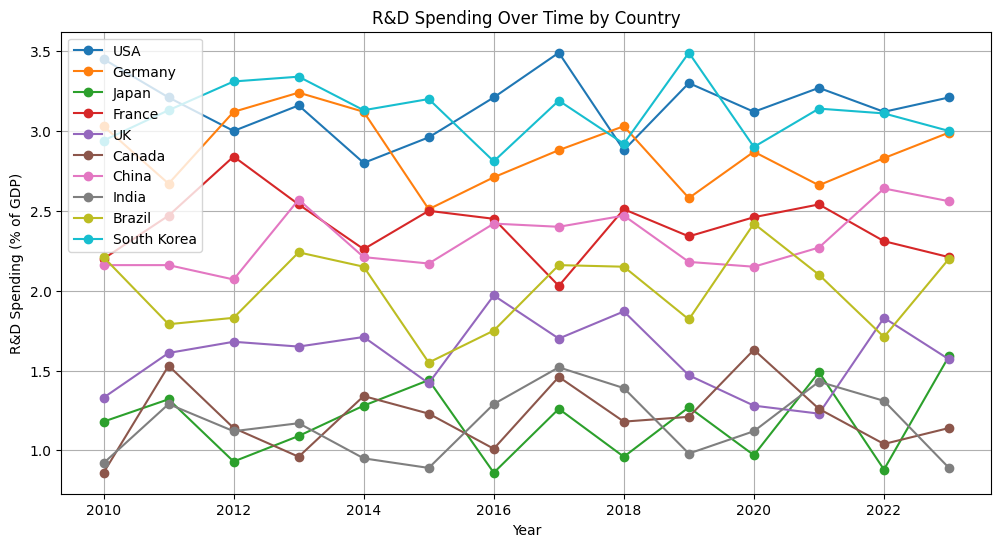

In [ ]:
# Plot R&D Spending over time by country
plt.figure(figsize=(12, 6))
for country in df_all["Country"].unique():
    subset = df_all[df_all["Country"] == country]
    plt.plot(subset["Year"], subset["R&D_Spending"], marker='o', label=country)

plt.legend()
plt.title("R&D Spending Over Time by Country")
plt.xlabel("Year")
plt.ylabel("R&D Spending (% of GDP)")
plt.grid(True)
plt.show()


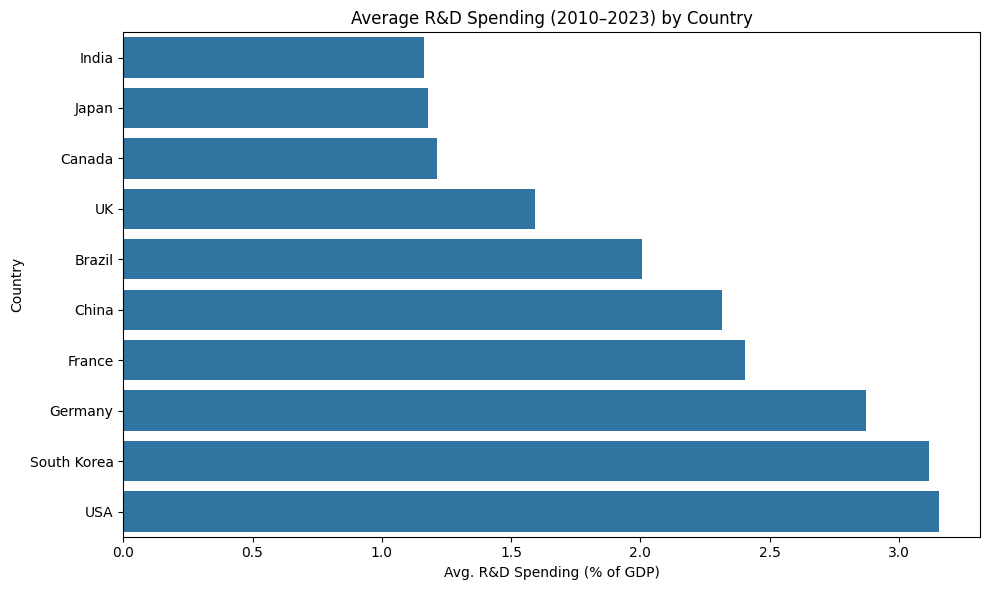

In [ ]:
avg_rnd = df_all.groupby("Country")["R&D_Spending"].mean().sort_values()

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_rnd.values, y=avg_rnd.index)
plt.title("Average R&D Spending (2010–2023) by Country")
plt.xlabel("Avg. R&D Spending (% of GDP)")
plt.ylabel("Country")
plt.tight_layout()
plt.show()


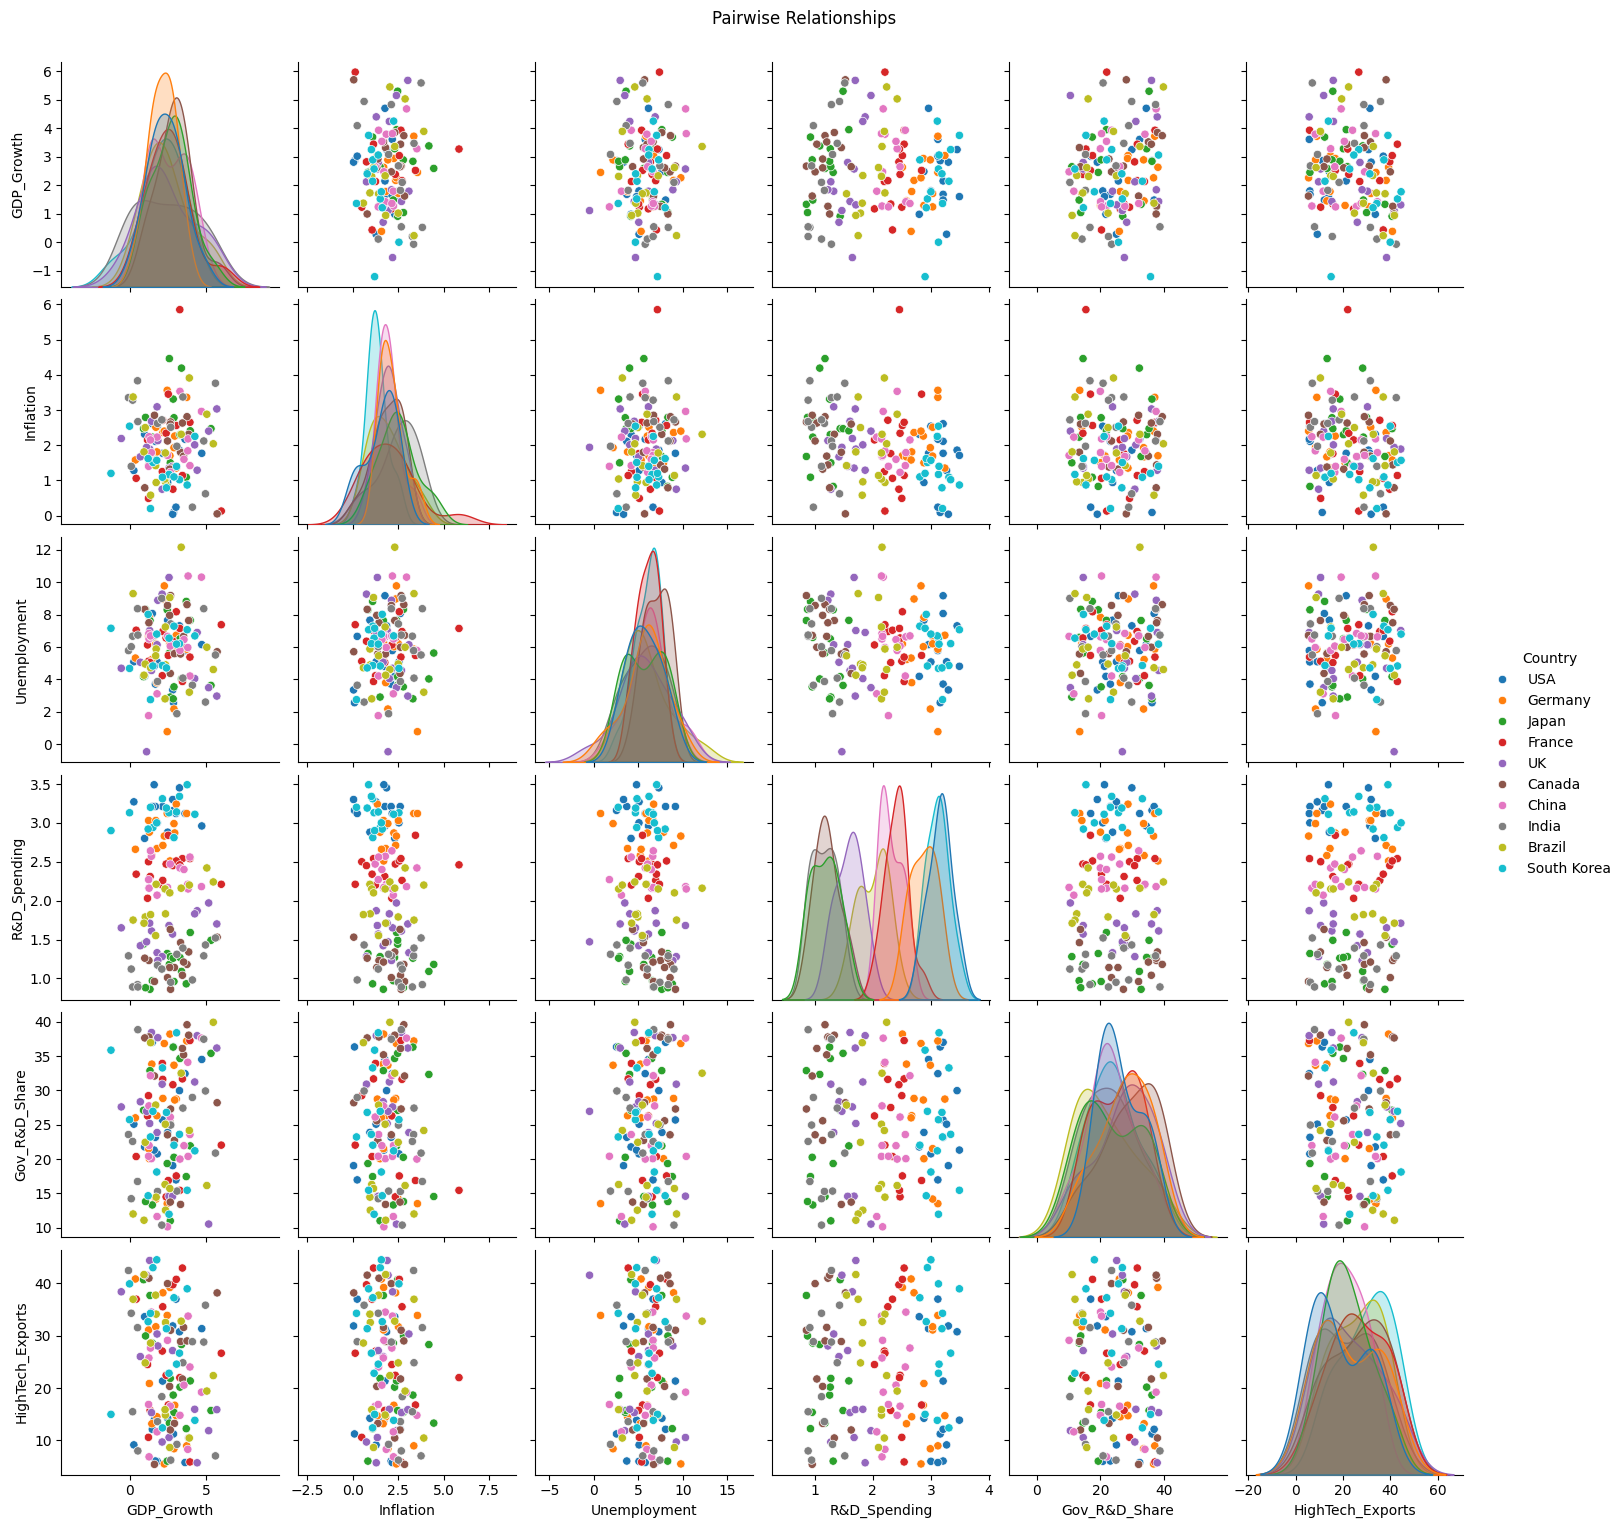

In [ ]:
sns.pairplot(df_all.drop(columns=["Year"]), hue="Country")
plt.suptitle("Pairwise Relationships", y=1.02)
plt.show()


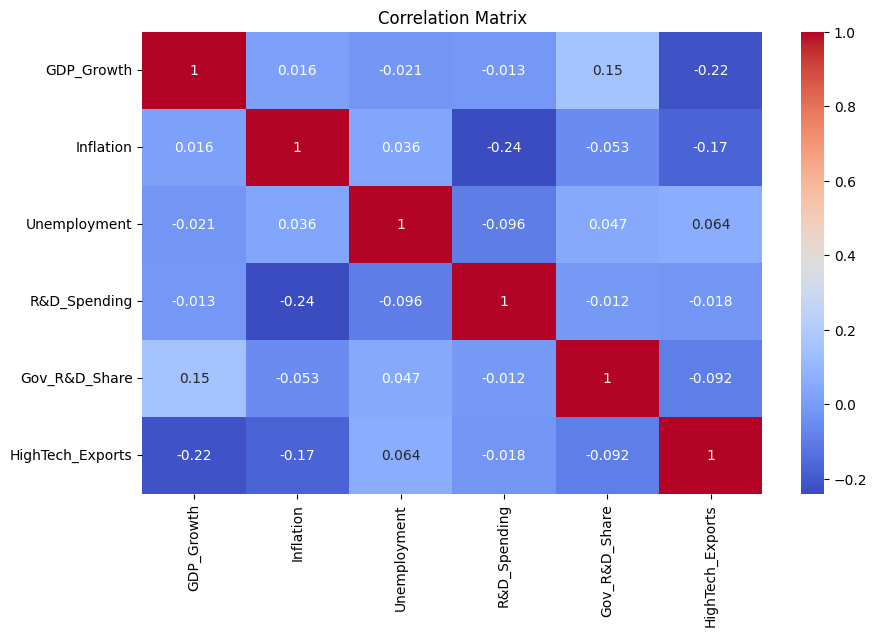

In [ ]:
# Drop non-numeric columns for correlation matrix
numeric_df = df_all.drop(columns=["Year", "Country"])

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()



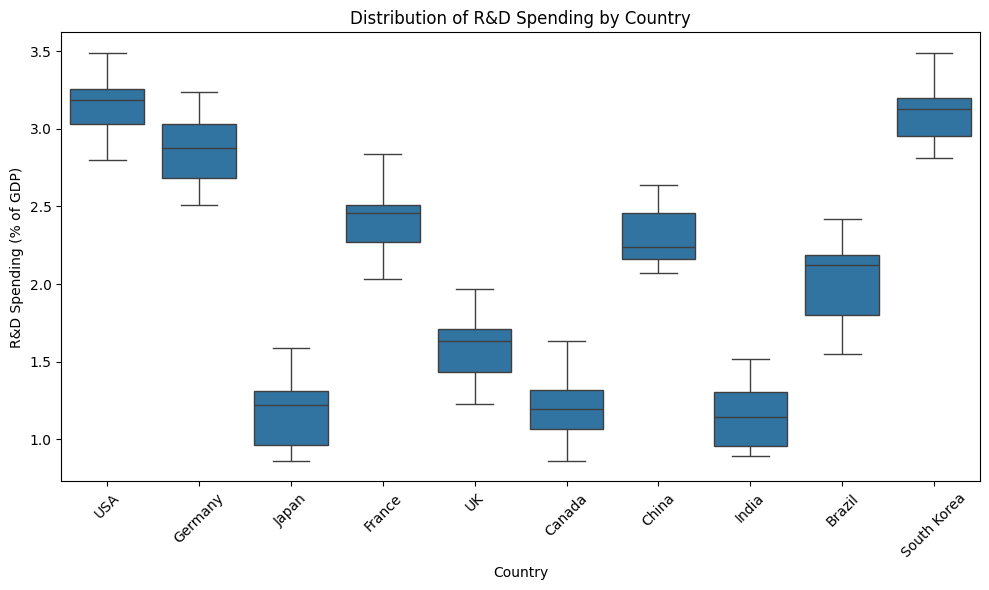

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_all, x="Country", y="R&D_Spending")
plt.xticks(rotation=45)
plt.title("Distribution of R&D Spending by Country")
plt.ylabel("R&D Spending (% of GDP)")
plt.xlabel("Country")
plt.tight_layout()
plt.show()


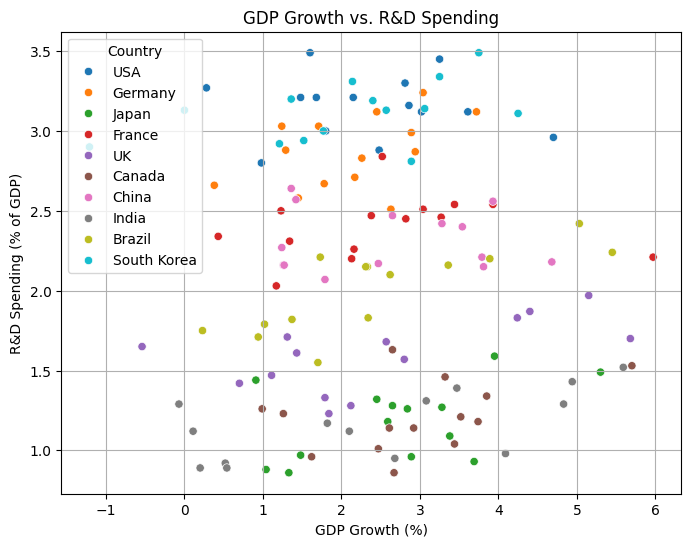

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_all, x="GDP_Growth", y="R&D_Spending", hue="Country")
plt.title("GDP Growth vs. R&D Spending")
plt.xlabel("GDP Growth (%)")
plt.ylabel("R&D Spending (% of GDP)")
plt.grid(True)
plt.show()


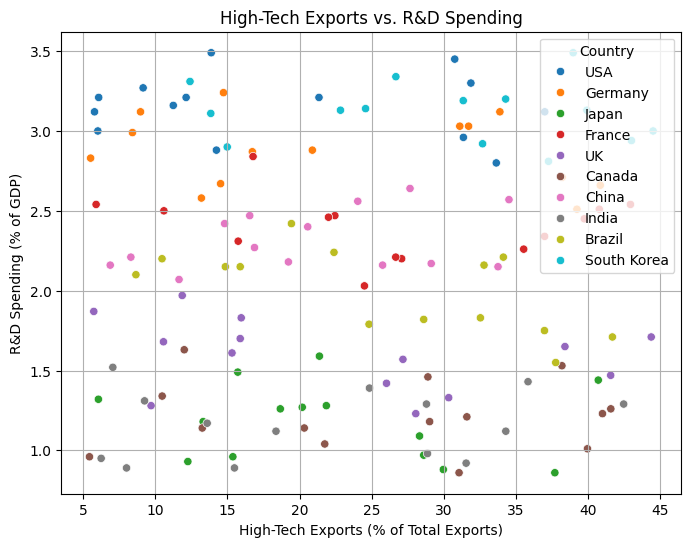

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_all, x="HighTech_Exports", y="R&D_Spending", hue="Country")
plt.title("High-Tech Exports vs. R&D Spending")
plt.xlabel("High-Tech Exports (% of Total Exports)")
plt.ylabel("R&D Spending (% of GDP)")
plt.grid(True)
plt.show()


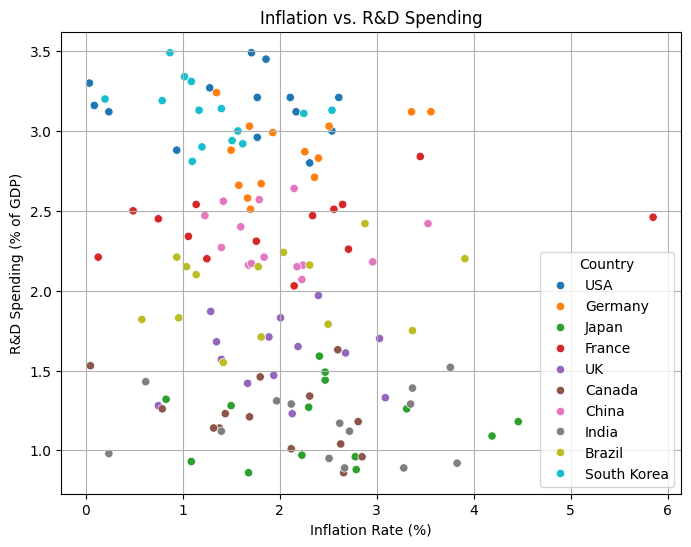

In [ ]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_all, x="Inflation", y="R&D_Spending", hue="Country")
plt.title("Inflation vs. R&D Spending")
plt.xlabel("Inflation Rate (%)")
plt.ylabel("R&D Spending (% of GDP)")
plt.grid(True)
plt.show()
